### D1110_과제_이준기

- 대구지역의 기온 변화
        (1) 지구온난화 현상
             => 다른 지역은? 

In [1]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
## 데이터 준비
DATA_FILE = '../data/대구 100년.csv'

daeguDF = pd.read_csv(DATA_FILE, skiprows=7)
daeguDF.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1925-01-01,143.0,-1.5,-4.5,1.3
1,\t1925-01-02,143.0,-0.3,-6.1,5.0
2,\t1925-01-03,143.0,-1.9,-4.3,1.4
3,\t1925-01-04,143.0,-3.3,-6.3,0.1
4,\t1925-01-05,143.0,-2.0,-6.7,1.3


In [4]:
# 데이터 전처리
daeguDF = daeguDF.drop('지점', axis=1)
daeguDF['날짜'] = daeguDF['날짜'].str.strip()
daeguDF

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1925-01-01,-1.5,-4.5,1.3
1,1925-01-02,-0.3,-6.1,5.0
2,1925-01-03,-1.9,-4.3,1.4
3,1925-01-04,-3.3,-6.3,0.1
4,1925-01-05,-2.0,-6.7,1.3
...,...,...,...,...
36834,2025-11-06,12.8,6.7,21.2
36835,2025-11-07,13.1,7.7,20.6
36836,2025-11-08,12.9,7.8,18.3
36837,2025-11-09,14.6,11.1,19.3


In [5]:
daeguDF.isnull().sum()
daeguDF = daeguDF.dropna()

In [6]:
daeguDF.isnull().sum()

날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

C:\Users\KDT\AppData\Local\Temp\ipykernel_344\3013103122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])
C:\Users\KDT\AppData\Local\Temp\ipykernel_344\3013103122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daeguDF['year'] = daeguDF['날짜'].dt.year


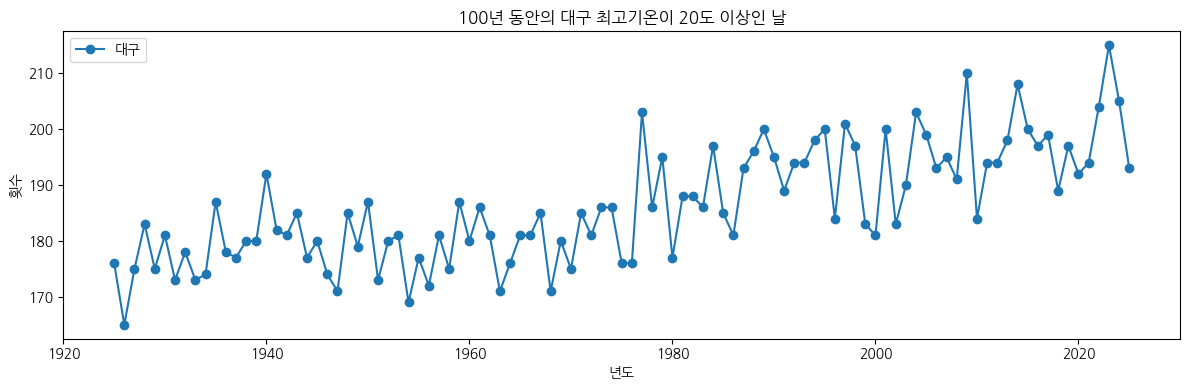

In [14]:
daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])
daeguDF['year'] = daeguDF['날짜'].dt.year

summer_mask = daeguDF['최고기온(℃)'] > 20

summer_days_per_year = summer_mask.groupby(daeguDF['year']).sum()

plt.figure(figsize=(12,4))
plt.plot(summer_days_per_year.index, summer_days_per_year.values,'-o')
plt.ylabel('횟수')
plt.xlabel('년도')
plt.title('100년 동안의 대구 최고기온이 20도 이상인 날')
plt.tight_layout()
plt.legend(['대구'])
plt.show()

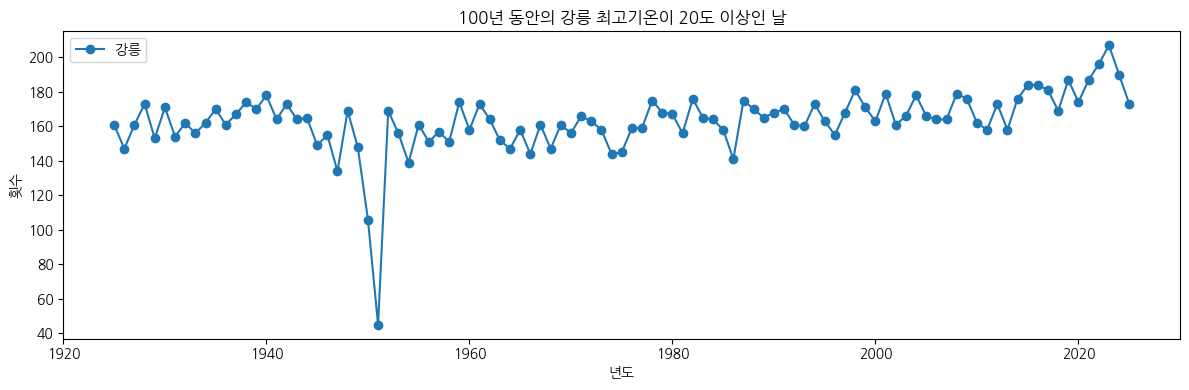

In [13]:
## 강릉 100년 데이터
DATA_FILE = '../data/강릉 100년.csv'
GangneungDF = pd.read_csv(DATA_FILE, skiprows=7)

# 데이터 전처리
GangneungDF = GangneungDF.drop('지점', axis=1)
GangneungDF['날짜'] = GangneungDF['날짜'].str.strip()
GangneungDF = GangneungDF.dropna()

GangneungDF['날짜'] = pd.to_datetime(GangneungDF['날짜'])
GangneungDF['year'] = GangneungDF['날짜'].dt.year
summer_mask = GangneungDF['최고기온(℃)'] > 20
summer_days_per_year = summer_mask.groupby(GangneungDF['year']).sum()

plt.figure(figsize=(12,4))
plt.plot(summer_days_per_year.index, summer_days_per_year.values,'-o')
plt.ylabel('횟수')
plt.xlabel('년도')
plt.title('100년 동안의 강릉 최고기온이 20도 이상인 날')
plt.tight_layout()
plt.legend(['강릉'])
plt.show()

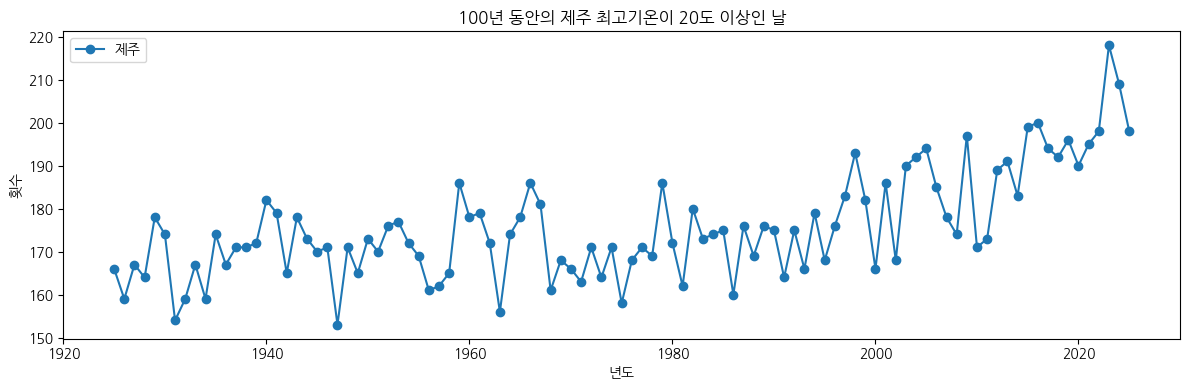

In [12]:
## 제주 100년 데이터
DATA_FILE = '../data/제주 100년.csv'
JejuDF = pd.read_csv(DATA_FILE, skiprows=7)

# 데이터 전처리
JejuDF = JejuDF.drop('지점', axis=1)
JejuDF['날짜'] = JejuDF['날짜'].str.strip()
JejuDF = JejuDF.dropna()

JejuDF['날짜'] = pd.to_datetime(JejuDF['날짜'])
JejuDF['year'] = JejuDF['날짜'].dt.year
summer_mask = JejuDF['최고기온(℃)'] > 20
summer_days_per_year = summer_mask.groupby(JejuDF['year']).sum()

plt.figure(figsize=(12,4))
plt.plot(summer_days_per_year.index, summer_days_per_year.values,'-o')
plt.ylabel('횟수')
plt.xlabel('년도')
plt.title('100년 동안의 제주 최고기온이 20도 이상인 날')
plt.tight_layout()
plt.legend(['제주'])
plt.show()

- 대구지역의 인구 /구별로 <hr>
	(1) 성별 인구 비율
	(2) 투표 가능 인구
    (3) 학령 인구 

In [10]:
## 성별 인구 비율 구하기
DATA_FILE = '../data/주민등록인구및세대현황_연간.csv'
df = pd.read_csv(DATA_FILE)
df

,행정구역,2024년_거주자 인구수,2024년_세대수,2024년_세대당 인구,2024년_남자 인구수,2024년_여자 인구수,2024년_남여 비율
0,대구광역시 (2700000000),"2,355,509","1,097,444",2.15,"1,154,720","1,200,789",0.96
1,대구광역시 대구광역시 중구 (2711000000),"97,128","48,293",2.01,"46,451","50,677",0.92
2,대구광역시 대구광역시 동구 (2714000000),"341,009","163,706",2.08,"166,624","174,385",0.96
3,대구광역시 대구광역시 서구 (2717000000),"162,326","83,566",1.94,"80,388","81,938",0.98
4,대구광역시 대구광역시 남구 (2720000000),"135,377","74,445",1.82,"64,480","70,897",0.91
5,대구광역시 대구광역시 북구 (2723000000),"411,821","190,815",2.16,"203,888","207,933",0.98
6,대구광역시 대구광역시 수성구 (2726000000),"407,797","173,708",2.35,"196,111","211,686",0.93
7,대구광역시 대구광역시 달서구 (2729000000),"520,493","236,137",2.20,"254,866","265,627",0.96
8,대구광역시 대구광역시 달성군 (2771000000),"257,150","113,415",2.27,"130,329","126,821",1.03
9,대구광역시 대구광역시 군위군 (2772000000),"22,408","13,359",1.68,"11,583","10,825",1.07


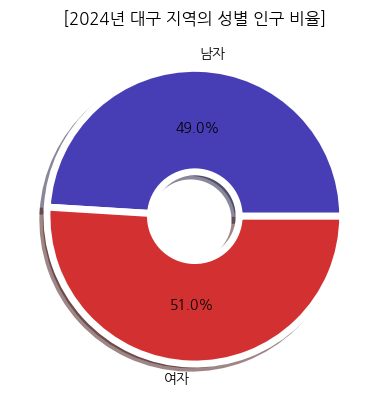

2024년 대구광역시 성별 인구 남자 : 1,154,720명, 여자 : 1,200,789명


In [11]:
## 성별 인구 비율 파이 그래프로 나타내기
sex = df.iloc[:, 4:6]
value1 = int(sex.iloc[0, 0].replace(',', ''))
value2 = int(sex.iloc[0, 1].replace(',', ''))
size = [value1, value2]

wedgeDict = {'width':0.7, 'linewidth':5, "edgecolor":'white'}
plt.pie(size, labels=['남자', '여자'],
        autopct='%1.1f%%',
        colors=["#473DB5","#D33131"],
        shadow=True,
        wedgeprops=wedgeDict)
plt.title('[2024년 대구 지역의 성별 인구 비율]')
plt.show()

print(f'2024년 대구광역시 성별 인구 남자 : {value1:,}명, 여자 : {value2:,}명')

In [12]:
## 투표 가능 인구 구하기
DATA_FILE = '../data/연령별인구현황_연간.csv'
df = pd.read_csv(DATA_FILE)
df

,행정구역,2024년_거주자_총인구수,2024년_거주자_연령구간인구수,2024년_거주자_0~4세,2024년_거주자_5~9세,2024년_거주자_10~14세,2024년_거주자_15~19세,2024년_거주자_20~24세,2024년_거주자_25~29세,2024년_거주자_30~34세,...,2024년_여_거주자_55~59세,2024년_여_거주자_60~64세,2024년_여_거주자_65~69세,2024년_여_거주자_70~74세,2024년_여_거주자_75~79세,2024년_여_거주자_80~84세,2024년_여_거주자_85~89세,2024년_여_거주자_90~94세,2024년_여_거주자_95~99세,2024년_여_거주자_100세 이상
0,대구광역시 (2700000000),"2,355,509","2,355,509","54,867","87,326","106,977","105,294","124,994","142,569","147,751",...,"106,888","104,130","91,406","65,274","48,629","40,033","23,811","8,736","1,845",217
1,대구광역시 중구 (2711000000),"97,128","97,128","3,792","4,128","3,630","3,443","5,540","7,873","9,152",...,"3,231","3,110","2,982","2,380","2,082","1,645","1,004",362,75,14
2,대구광역시 동구 (2714000000),"341,009","341,009","8,620","11,978","13,284","12,645","15,708","20,136","23,440",...,"14,814","15,450","14,720","10,909","8,342","6,793","3,868","1,399",293,37
3,대구광역시 서구 (2717000000),"162,326","162,326","2,899","3,955","4,611","4,815","6,541","9,276","10,544",...,"8,074","8,919","8,486","6,380","4,547","3,700","2,068",696,147,21
4,대구광역시 남구 (2720000000),"135,377","135,377","2,287","2,989","3,729","4,309","7,298","9,512","9,045",...,"5,863","6,433","6,515","5,007","4,075","3,409","2,060",769,177,22
5,대구광역시 북구 (2723000000),"411,821","411,821","9,020","14,633","18,487","19,478","26,270","27,081","25,242",...,"19,096","17,833","14,536","10,106","7,767","6,563","3,586","1,331",291,34
6,대구광역시 수성구 (2726000000),"407,797","407,797","8,193","17,055","23,768","23,352","22,877","22,159","21,019",...,"18,542","16,435","14,433","10,425","7,880","6,471","3,969","1,539",347,36
7,대구광역시 달서구 (2729000000),"520,493","520,493","10,919","18,626","24,266","25,018","29,782","32,751","32,187",...,"25,678","24,385","19,844","13,448","9,213","7,352","4,545","1,543",313,31
8,대구광역시 달성군 (2771000000),"257,150","257,150","8,905","13,716","14,803","11,784","10,568","13,247","16,544",...,"10,606","10,208","8,455","5,449","3,793","3,061","1,911",782,154,19
9,대구광역시 군위군 (2772000000),"22,408","22,408",232,246,399,450,410,534,578,...,984,"1,357","1,435","1,170",930,"1,039",800,315,48,3


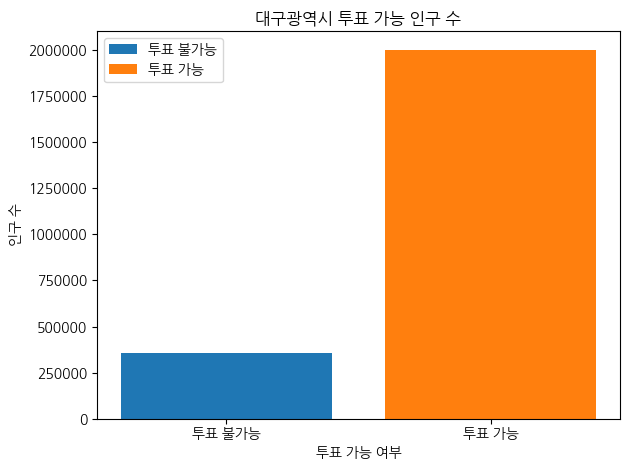

2024년 대구광역시 총 투표 가능 인구 수 : 2,001,045


In [13]:
## 대구광역시 투표 가능 인구 수 => ( (총 인구 수) - (0~19세 인구 수) )
total = int(df.iloc[0, 1].replace(',',''))
not_total = int(df.iloc[0, 3].replace(',','')) + int(df.iloc[0, 4].replace(',','')) + int(df.iloc[0, 5].replace(',','')) + int(df.iloc[0, 6].replace(',',''))
vote_age_count = total - not_total

plt.bar('투표 불가능', not_total, label='투표 불가능')
plt.bar('투표 가능', vote_age_count, label='투표 가능')
plt.title('대구광역시 투표 가능 인구 수')
plt.legend()
plt.xlabel('투표 가능 여부')
plt.ylabel('인구 수')

plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

print(f'2024년 대구광역시 총 투표 가능 인구 수 : {vote_age_count:,}')

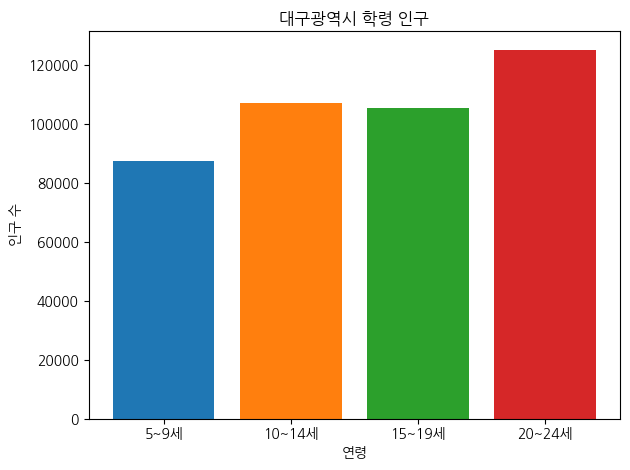

2024년 대구광역시 총 학령 인구 : 424,591명


In [14]:
## 대구광역시 학령 인구 => 초등학생 ~ 대학생 수 (약 5 ~ 24세)
a1 = int(df.iloc[0, 4].replace(',',''))
a2 = int(df.iloc[0, 5].replace(',',''))
a3 = int(df.iloc[0, 6].replace(',',''))
a4 = int(df.iloc[0, 7].replace(',',''))

plt.bar('5~9세', a1)
plt.bar('10~14세', a2)
plt.bar('15~19세', a3)
plt.bar('20~24세', a4)
plt.title('대구광역시 학령 인구')
plt.xlabel('연령')
plt.ylabel('인구 수')
plt.tight_layout()
plt.show()
print(f'2024년 대구광역시 총 학령 인구 : {(a1+a2+a3+a4):,}명')